<a href="https://colab.research.google.com/github/henichole/Data-Visualization-and-Dashboards-with-Tableau/blob/main/Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W4D2 Machine Learning & Linear Regression

 - Instructor: Alibek Kruglikov
 - Original notebook by: Socorro Dominguez

## Agenda
1. Machine Learning
    - Supervised vs. Unsupervised Learning
2. Supervised Learning
    - `X` and `y`
    - Regression vs. Classification    
    - The golden rule: train/test split
3. Simple Linear Regression
4. Polynomial Regression

## Machine Learning


## Definition of ML / What is ML?

Seen as a subset of AI. ML algorithms build a model based on sample data (training data), in order to make predictions without being explicitly programmed to do so.

A field of study that gives computers the ability to learn without being explicitly programmed.
– Arthur Samuel (1959)

# Types of Machine Learning: Supervised and Unsupervised

## Machine Learning: Supervised Learning
- In supervised learning, we have a set of observations (__*X*__) with an associated target (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations

 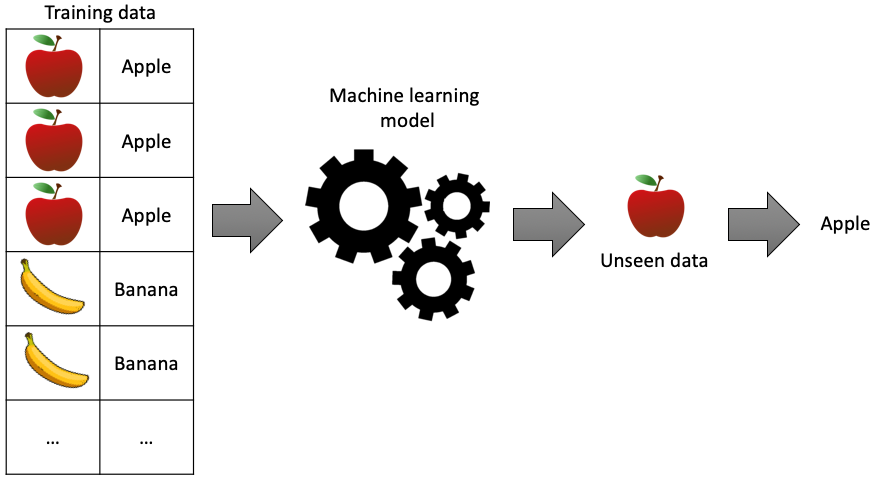

## Machine Learning: Unsupervised Learning
- We have __*X*__ (the data) but no __*y*__ (associated target)

 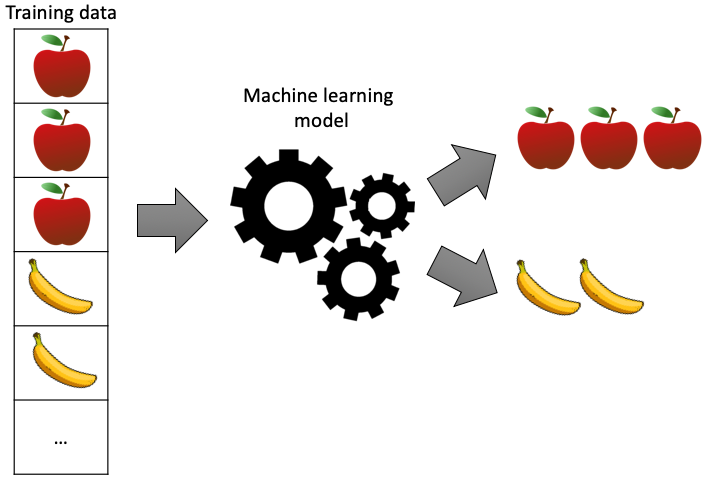

# Types of Supervised Learning: Regression and Classification

## Classification vs. Regression

* Classification problems: predicting among two or more categories, also known as classes
    - Predict whether a patient has a liver disease or not
    - Predict whether the letter grade of a student (A, B, C, D or F)
* Regression problem: predicting a continuous (in other words, a number) value
    - Predict house prices
    - Predict someone's age from their photo

## The golden rule
- When you're doing supervised learning, now that you've identified **X** and **y**
- **You need to split your data into train and test**
- **You only work with the training data**

### Why?
- As soon as you start making decisions on what features to include, drop etc., you are letting a part of the test data influence your decision-making
- Your results will not be truly representative of "unseen data"

## The big picture
- We train using the **training data**
- We test what is learned by the model on the **test data**
- We have two scores: **training** vs. **test**

### Which matters more?
- It doesn't matter how good our **training score** is because the **test score is what matters**
- Good models that generalize well though will have **similar training and testing scores**

**We want to pick models that generalize well to unseen data**

## The fundamental tradeoff

| Model | Training Score relative to Test Score | Performance |
|:-|:-|:-|
| Too Complex|High training score compared to test score| Overfit |
|Too Simple|Low training score and low test score|Underfit|

- Models that have **extremely high training scores** (that are too good to be true) that are **highly complex** that learned very complex relationships in the training data **can be overfit**
- On the other hand, models that have **low training scores** that are **very simple** may not have learned the necessary relationships in the training data needed to predict well on unseen data; they are **underfit**

![img](https://miro.medium.com/max/2250/1*_7OPgojau8hkiPUiHoGK_w.png)

## Minimizing approximation error ...
... means that our model generalizes well


$$E_{approx} = (E_{test} - E_{train})$$

- There is generally a "trade-off" between complexity and test error
- A more complex model will fit closer to the peculiarities of the training data
    - i.e., $E_{approx}\;$ tends to get bigger as our model becomes more complex
- This means it will likely not generalise well to new data!
- $E_{approx}\;$ tends to get smaller with more data

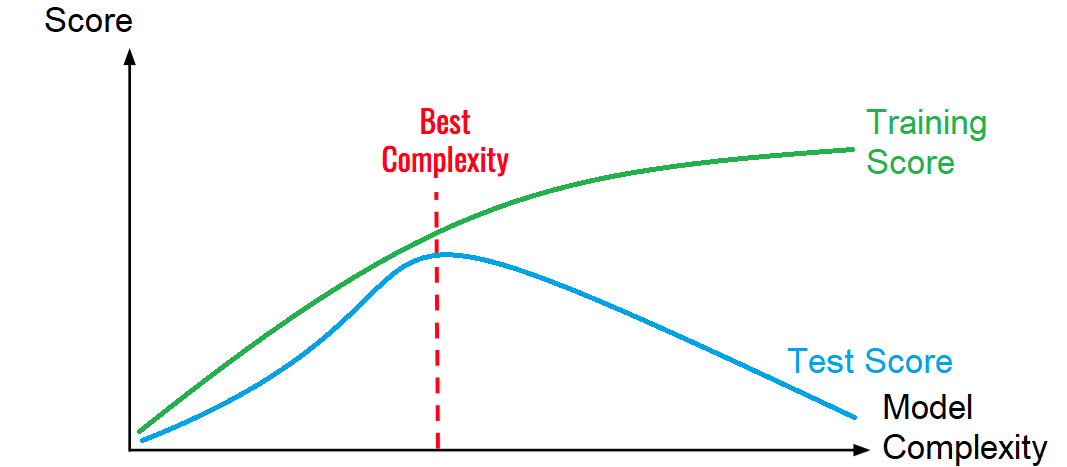

## The fundamental tradeoff (part 2)
... In the "bias-variance" language

- **The bias error** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **The variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

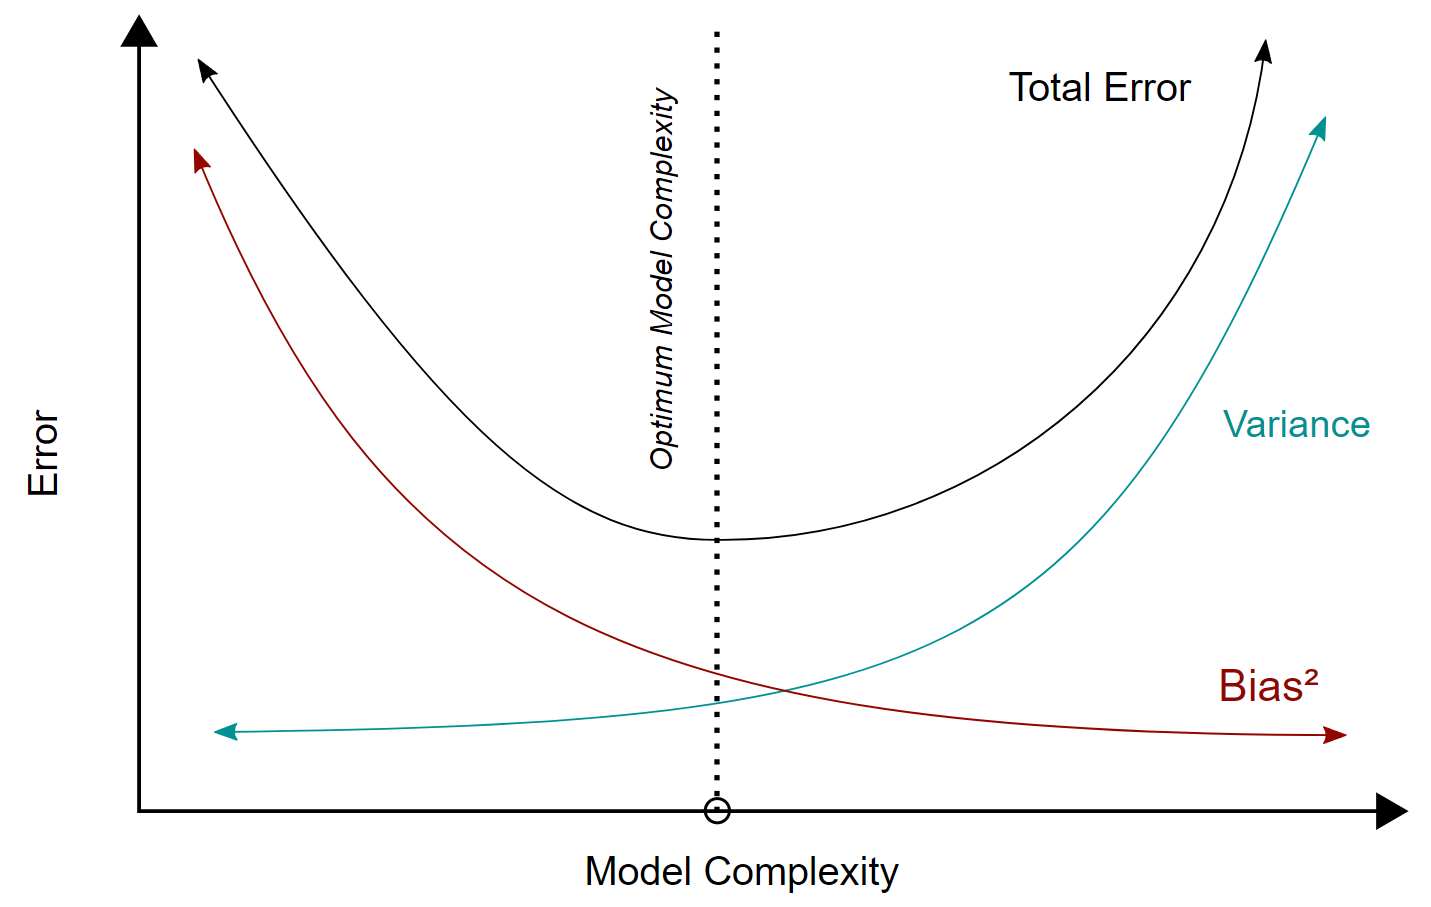

## Linear Regression

- Linear regression is one of the most basic and popular ML/statistical techniques.
- Used as a predictive model
- Assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate, **y**) and the independent variable/s (input variable/s used in the prediction, **X**)

### Let's start with **simple** linear regression
- Only one independent/input variable is used to predict the dependent variable.

## Simple Linear Regression

$$\hat{y} = wx + b$$

$\hat{y}$ = Dependent variable

$b$ = Constant

$w$ = Coefficients

$x$ = Independent variable

## Multiple Linear Regression
- Many $x$'s and $w$'s

$$\hat{y} = w_1x_1 + w_2x_2 + ... + b$$

- The larger the value of $w_i$, the more influence $x_i$ has on the target $\hat{y}$

## Matrix representation

- $\hat{y}$ is the linear function of features $x$ and weights $w$.

$$\hat{y} = w^Tx + b$$
        
- $\hat{y} \rightarrow$ prediction
- $w \rightarrow$ weight vector
- $b \rightarrow$ bias
- $x \rightarrow$ features

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix} + b$$

## Matrix representation for multiple predictions

$$\hat{y} = w^TX + b$$
        

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x^{(1)}_1 & x^{(2)}_1 & \ldots &x^{(n)}_1\\ x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\ \vdots & \vdots & \ldots \\ x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d\end{bmatrix} + b$$

## Let's try it!


Let's start simple and imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv('weight-height.csv', usecols = ['Height', 'Weight'])

df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

X_train_sample = df['Height'].values.reshape(-1, 1)
y_train_sample = df['Weight'].values

lr_sample = LinearRegression()

In [ ]:
lr_sample.fit(X_train_sample, y_train_sample)

In [ ]:
lr_sample.predict(X_train_sample)[:5]

In [ ]:
lr_sample.coef_

In [ ]:
lr_sample.intercept_

In [ ]:
plt.scatter(X_train_sample, y_train_sample, alpha=0.05);
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black')

In [ ]:
lr_sample.score(X_train_sample, y_train_sample)

## Coefficients and Intercept

The intuition behind Linear Regression is in the coefficients and intercept.

Some people refer to the coefficients as weights and the intercept as the bias. The 'Weights' and 'Bias' are what is being learned during `fit`.

## Let's load the California Housing Data Set

[Documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
california.keys()

## The golden rule
- **You need to split your data into train and test**


## So... how do we split?
- Most common way is to use `train_test_split` in `sklearn`
- Shuffles the data first and then splits it
- 80/20, 75/25, 70/30 are common splits

## Splitting out our X and y
- In this case, we are working with a regression problem. Could you say why?
- What are the features?
- What is the target?

In [ ]:
X = pd.DataFrame(california.data, columns = california.feature_names)
y = pd.DataFrame(california.target, columns = ['MedHouseVal'])

X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])

In [ ]:
X.describe()

## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

## Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
lr_coeffs = lr.coef_
lr_coeffs

In [ ]:
lr_intercept = lr.intercept_
lr_intercept

In [ ]:
words_coeffs_df = pd.DataFrame(data = lr_coeffs.T, index = X_train.columns, columns=['Coefficients'])
words_coeffs_df

Let’s try to make some sense of it here!

We can use these coefficients to interpret our model. They show us how much each of these features affects our model’s prediction.

**IMPORTANT**
In linear models:

* if the coefficient is +, then if the feature value goes UP the predicted value goes UP
* if the coefficient is -, then if the feature values goes UP the predicted value goes DOWN
* if the coefficient is 0, the feature is not used in making a prediction

## Feature Importances

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train_scaled))
results = model.fit()

In [ ]:
results.params

In [ ]:
print(results.summary())

## Predicting

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:5]

In [ ]:
lr.predict(X_test_scaled)

In [ ]:
y_test.values

## Prediction By Hand

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

$$\hat{y} = w_1x_1 + w_2x_2 + ... + w_8x_8 + b$$

In [ ]:
print(X_test_scaled[0])
(lr.coef_ * X_test_scaled[0]).sum(axis=1) + lr.intercept_

## Results interpretation

- Weights (coef_)
- Bias (intercept_)

- **R-squared** measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model

**What does that mean?**

* $R^2$ is a measure of fit.  
  
* It indicates how much variation of a dependent variable is explained by the independent variables.
  
* An R-squared of 100% means that $y$ is completely explained by the independent variables.


$R^2 = 1 - \frac{Unexplained Variation}{TotalVariation}$

$R^2 = 1 - \frac{RSS}{TSS}$

$R^2	=	$   coefficient of determination    
$RSS	=	$  sum of squares of residuals   
$$RSS =\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}$$   
$TSS	=	$   total sum of squares   
$$TSS=\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$$
$\bar{y}$ = mean value

Thus,

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}
$$

In [ ]:
lr.score(X_train_scaled, y_train)

In [ ]:
lr.score(X_test_scaled, y_test)

## Understanding $R^2$

In [ ]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
def make_plot(lr, x, y):
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="training data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")

    yhat = lr.predict(x[:,None])

    for i in range(len(y)):
        if i == 0:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red', label="residuals")
        else:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red')

    plt.legend(fontsize=12)

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
make_plot(lr, x, y)

## Polynomial regression

### Non-linear regression motivation
- Linear regression might seem rather limited.
- What if the true relationship between the target and the features is non-linear?


**We still use the linear regression framework, but create quadratic, cubic etc. features**

## Let's see an example

In [ ]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]

In [ ]:
plt.scatter(X, y, color='blue');

## Fitting a linear regression line

In [ ]:
lr = LinearRegression()

lr.fit(X, y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3)

## Using polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)

X_deg = poly_feats.fit_transform(X)

X_poly_feat_names = poly_feats.get_feature_names_out(['x'])

df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y

In [ ]:
df_poly.head()

## Fitting polynomial features


What sklearn does is - If you substitute $x^2$ as another variable such as `m`, then the equation now is:

`y=w*m + b`  

The relation between `y` and `m` is linear but it is not linear between `x` and `y`.

Because of this "technically", it is linear regression just the variables between which it happens is $x^2$ (`m`) and `y` and not `x` and `y`.

In [ ]:
lr_poly = LinearRegression()

lr_poly.fit(X_deg, y)

preds = lr_poly.predict(X_deg)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);

In [ ]:
lr_poly.coef_

In [ ]:
lr_poly.intercept_